In [1]:
"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

juliamap (generic function with 1 method)

In [ ]:
@doc juliamap

In [3]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Vectorize j0 over arrays of Complex numbers
@vectorize_1arg Complex j0

# List the available methods for j0 for different types
methods(j0)

# 4 methods for generic function "j0":
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},1}) at operators.jl:380
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},2}) at operators.jl:381
j0{T<:Complex{T<:Real}}(::AbstractArray{T<:Complex{T<:Real},N}) at operators.jl:383
j0(z) at In[3]:2

So the @vectorize_1arg macro takes in functions of 1 argument and is able to vectorize them such that the agument your function takes in can be arrays of any dimension and the function will act on each index.

In [4]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [5]:
# The vectorized function can be applied directly to the plane
@time cp = complex_plane()
@time j0p = j0(cp)

  0.592141 seconds (544.49 k allocations: 84.948 MB, 1.38% gc time)
  0.741814 seconds (37.81 k allocations: 32.261 MB, 2.35% gc time)


2000x2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

So the complex_plane() function takes in the minimum and maximum values of the y and x axes, along with the number of points you want in your generated plane. It seems weird that adding and multiplying 2 vectors can give you a plane, but noticing that there is a little tiny
' mark after the x variable is key. That little quotation transposes the x variable array so that we can get our matrix.

The @time macro tells the amount of time and memory allocation of the given function.

In [6]:
immutable ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Complex{Float64},2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=2000, ypoints=2000)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [7]:
cp = ComplexPlane(xpoints=200,ypoints=200);
typeof(cp)

ComplexPlane

In [8]:
print(typeof(cp.x))
j0(cp.z)

LinSpace{Float64}

200x200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

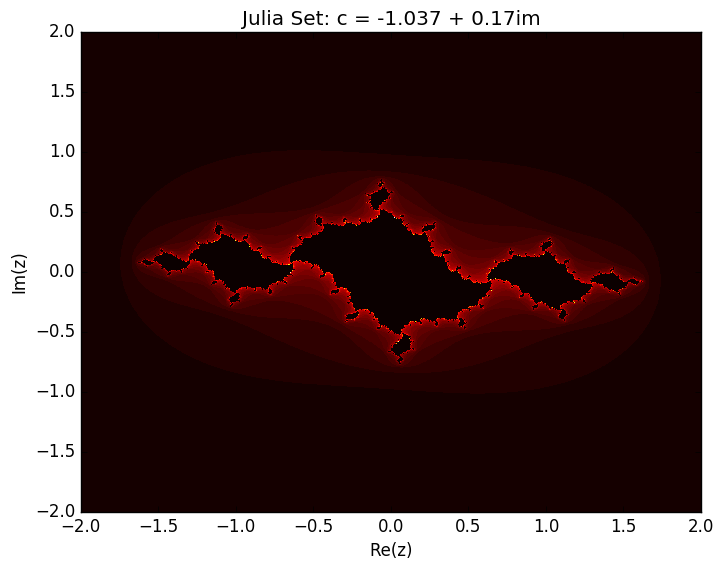

PyObject <matplotlib.collections.QuadMesh object at 0x7fe27ab05fd0>

In [10]:
using PyPlot                         #  Load package into the current namespace


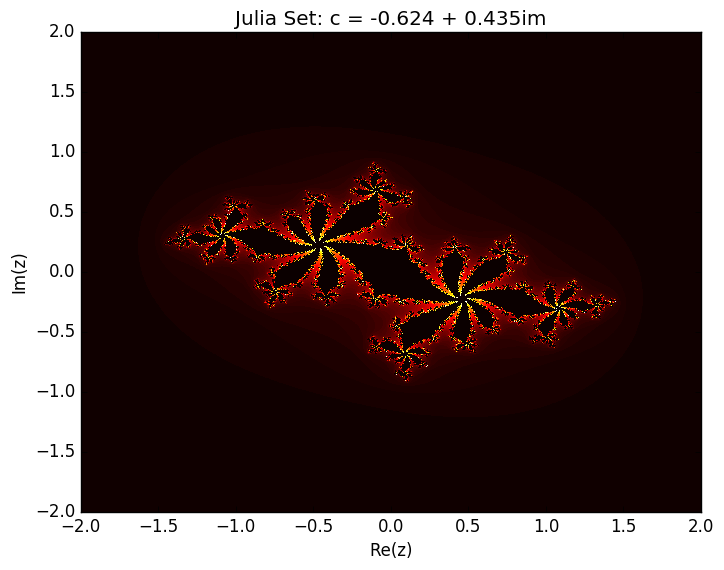

PyObject <matplotlib.collections.QuadMesh object at 0x7fe27a521750>

In [14]:
c = -0.624 + 0.435im #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
@vectorize_1arg Complex j            #  Vectorize julia map
cp = ComplexPlane()                  #  Create 2000x2000 point complex plane
jp = j(cp.z);                        #  Apply julia map to entire plane

xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cp.x, cp.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
                      #  Get Current Figure and display in notebook

# alternatively, instead of displaying in notebook, replace previous line with
# savefig("julia.png")               #  Output figure to png file